# Particle Swarm Optimization (PSO)

## Method description:

[Wikipédia - Particle swarm optimization](https://en.wikipedia.org/wiki/Particle_swarm_optimization):

> In computational science, particle swarm optimization (PSO) [1] is a computational method that optimizes a problem by iteratively trying to improve a candidate solution with regard to a given measure of quality. It solves a problem by having a population of candidate solutions, here dubbed particles, and moving these particles around in the search-space according to simple mathematical formulae over the particle's position and velocity. Each particle's movement is influenced by its local best known position, but is also guided toward the best known positions in the search-space, which are updated as better positions are found by other particles. This is expected to move the swarm toward the best solutions.

[1] GOLBON-HAGHIGHI, Mohammad-Hossein et al. Pattern Synthesis for the Cylindrical Polarimetric Phased Array Radar (CPPAR). Progress In Electromagnetics Research, v. 66, p. 87-98, 2018.

A particle swarm searching for the global minimum of a function:

![ChessUrl](figures/ParticleSwarmArrowsAnimation.gif)

## Pseudocode:

Let $S$ be the number of particles in the swarm, each having a position $x_i \in \mathbb{R}^{n}$ in the search-space and a velocity $v_i \in \mathbb{R}^{n}$. Let $p_i$ be the best known position of particle $i$ and let $g$ be the best known position of the entire swarm. A basic PSO algorithm is then:
   

**for** each particle $i = 1, ..., S$ **do** <br>
&emsp;Initialize the particle's position with a uniformly distributed random vector: $x_i \sim U(b_{lo}, b_{up}$) <br>
&emsp;Initialize the particle's best known position to its initial position: $p_i ← x_i$ <br>
&emsp;**if** $f(p_i) < f(g)$ **then** <br>
&emsp;&emsp;update the swarm's best known  position: $g ← p_i$ <br>
&emsp;Initialize the particle's velocity: $v_i \sim U(-\mid b_{up}-b_{lo} \mid, \mid b_{up}-b_{lo} \mid)$ <br>
**while** a termination criterion is not met **do**: <br>
&emsp;**for** each particle $i = 1, ..., S$ **do** <br>
&emsp;&emsp;   **for** each dimension $d = 1, ..., n$ **do** <br>
&emsp;&emsp;&emsp;      Pick random numbers: $r_p, r_g \sim U(0,1)$ <br>
&emsp;&emsp;&emsp;      Update the particle's velocity: $v_{i,d} ← \omega v_{i,d} + \varphi_p r_p (p_{i,d}-x_{i,d}) + \varphi_g r_g (g_d - x_{i, d})$ <br>
&emsp;&emsp;   Update the particle's position: $x_i ← x_i + v_i$ <br>
&emsp;&emsp;   **if** $f(x_i) < f(p_i)$ **then** <br>
&emsp;&emsp;&emsp;      Update the particle's best known position: $p_i ← x_i$ <br>
&emsp;&emsp;&emsp;      **if** $f(p_i) < f(g)$ **then** <br>
&emsp;&emsp;&emsp;         Update the swarm's best known position: $g ← p_i$ <br>


The values $b_{lo}$ and $b_{up}$ are respectively the lower and upper boundaries of the search-space. The termination criterion can be the number of iterations performed, or a solution where the adequate objective function value is found.[11] The parameters $\omega$, $\varphi_p$, and $\varphi_g$ are selected by the practitioner and control the behaviour and efficacy of the PSO method

The function that will be used in used in this notebook is:

$\large f(x) = x (sen(10\pi x)) + 1$

where $[-1 <= x <= 2]$.

We try to maximize the $f(x)$, where $x$ is limited between $2$ and $-1$.

# Execution of PSO

In [1]:
# Third-party libraries
import numpy as np
from numpy import absolute
from numpy.random import uniform, choice
from random import randint

import seaborn as sns
import matplotlib.pyplot as plt

from IPython.display import HTML, display
from pprint import pprint
from tabulate import tabulate

In [2]:
# Codes Implemented
from python_codes.evaluation import fitness_fx
from python_codes.particle import Particle

In [3]:
# Algorithm parameters
(b_lo, b_up) = (-1, 2)  # Lower and up boundaries
n_dimensions = 5        # Number of genes per particle
n_particles = 100       # Number of particles in population
swam_size = 2           # Number of neighbors for each particle (swarm)
n_iters = 500           # Number of iterations (criterion)
g = None                # Best known position (vector)
omega = 1               # Omega contant
phi_p = 0.5             # Phi p constant
phi_g = 0.5             # Phi g constant

Next we generate the initial population:

In [4]:
# Generate particle population
particle_pop = []
for i in range(n_particles):
    part_velocity = uniform(-absolute(b_lo - b_up), absolute(b_lo - b_up), size=n_dimensions)
    part_position = uniform(low=b_lo, high=b_up, size=n_dimensions)
    best_position = part_position
    
    if g is not None:
        if fitness_fx(best_position).sum() > fitness_fx(g).sum():
            g = best_position.copy()
    else:
        g = best_position.copy()

    p = Particle(position=part_position, velocity=part_velocity, best_position=best_position)
    particle_pop.append(p)
    
# Define the swarm of each particle
for particle in particle_pop:
    neighbors = choice(particle_pop, size=swam_size)
    particle.neighbors_particles = neighbors

In [10]:
print('Best known position (g) in the initial population:', g)
print('f(g): ', fitness_fx(g).sum())

Best known position (g) in the initial population: [1.66226588 1.63457626 1.82589829 1.87030108 0.86681045]
f(g):  11.565157057023557


Now that we've a initial population, the algorithm its execute. That algorithm its based on the pseudocode, shown in the beginning of the notebook:

In [6]:
best_per_it = []

for it in range(n_iters):
    for particle in particle_pop:
        # Get the current values
        tmp_vel = particle.velocity.copy()
        tmp_position = particle.position.copy()
        tmp_best_pos = particle.best_position.copy()

        # Update particle velociy
        new_velocity = []
        for d in range(n_dimensions):
            r_p, r_g = uniform(), uniform()
            v_id = omega * tmp_vel[d] + phi_p * r_p * (
                tmp_best_pos[d] - tmp_position[d]) + phi_g * r_g * (g[d] - tmp_position[d])
            new_velocity.append(v_id)
        particle.velocity = np.array(new_velocity)

        # Update particle position
        tmp_position += new_velocity
        # If any dimension overcome the limits,
        # other values in the limits its generate for this dimension.
        tmp_position = [x if (-1 <= x <= 2) else uniform(low=b_lo, high=b_up) for x in tmp_position]
        particle.position = np.array(tmp_position)
        
        # Update best positions
        if fitness_fx(particle.position).sum() > fitness_fx(particle.best_position).sum():
            # Update the particles best known position
            particle.best_position = particle.position
            
            if fitness_fx(particle.best_position).sum() > fitness_fx(g).sum():
                # Update the swarms best known position
                g = particle.best_position
                
    best_per_it.append(g)

In [11]:
print('Best known position (g) after 500 iterations:', g)
print('f(g): ', fitness_fx(g).sum())

Best known position (g) after 500 iterations: [1.66226588 1.63457626 1.82589829 1.87030108 0.86681045]
f(g):  11.565157057023557


Next, we show the results by iteration. We can notice that the g position merge to a local minima.

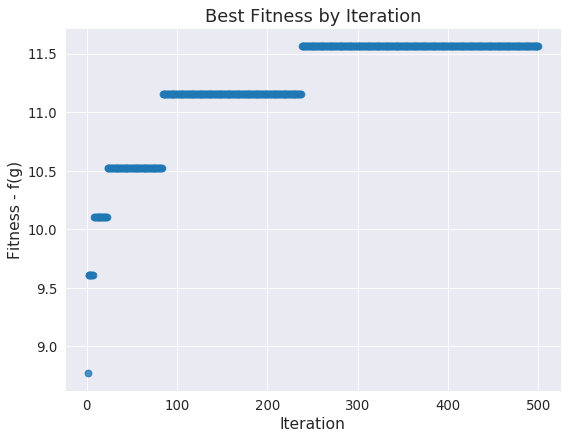

In [8]:
sns.set_style('darkgrid')

plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

y = np.array([fitness_fx(x).sum() for x in best_per_it])
x = np.array(range(1, len(y)+1))

sns.regplot(x=x, y=y, fit_reg=False)
plt.title('Best Fitness by Iteration', fontsize=16)
plt.xlabel('Iteration', fontsize=14)
plt.ylabel('Fitness - f(g)', fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.show()

# WIP

In [ ]:
# WIP: function to show points moving in each iteration...
%matplotlib inline
import time
import pylab as pl
from IPython import display

for i in range(10):
    pl.plot(pl.randn(100))
    display.clear_output(wait=True)
    display.display(pl.gcf())
    time.sleep(1.0)